# Loading Model

In [1]:
import torch

path = "models/transformer_6.8M.pt"
checkpoint = torch.load(path)

In [2]:
from src.enums import CheckpointEnum

print(f"Vocab Size:   {checkpoint[CheckpointEnum.VOCAB_SIZE]}")
print(f"D_Model:      {checkpoint[CheckpointEnum.D_MODEL]}")
print(f"Layers:       {checkpoint[CheckpointEnum.NUM_BLOCKS]}")
print(f"Heads:        {checkpoint[CheckpointEnum.NUM_HEADS]}")
print(f"Head Dim:     {checkpoint[CheckpointEnum.D_MODEL] // checkpoint[CheckpointEnum.NUM_HEADS]}")
print(f"Seq Len:      {checkpoint[CheckpointEnum.SEQ_LEN]}")
print(f"FF Hidden:    {checkpoint[CheckpointEnum.FF_HIDDEN_DIM]}")
print(f"Dropout:      {checkpoint[CheckpointEnum.DROPOUT]}")
print(f"num_params:   {checkpoint['num_params']:,}".replace(",", "."))

Vocab Size:   4000
D_Model:      256
Layers:       6
Heads:        8
Head Dim:     32
Seq Len:      128
FF Hidden:    1024
Dropout:      0.1
num_params:   6.819.232


# Loading Tokenizer

In [22]:
from pathlib import Path

from src.utils import load_bpe_hugging_face_tokenizer

BASE_DIR = Path.cwd()
TOKENIZER_DIR = BASE_DIR / "tokenizer"
path = TOKENIZER_DIR / "bpe_hugging_face_tokenizer.json"


tokenizer = load_bpe_hugging_face_tokenizer(path)

Loaded BPE hugging face tokenizer - vocab size: 4000


# Loading Data

In [23]:
from pathlib import Path

BASE_DIR = Path.cwd()

path = BASE_DIR / "data" / "letterboxd_filtered.jsonl"
path_full = BASE_DIR / "data" / "letterboxd_full_reformated.jsonl"

In [24]:
from src.utils.data_loader import read_file_only_reviews

text = read_file_only_reviews(path)

Number of reviews: 957.495


In [51]:
text_full = read_file_only_reviews(path_full)

Number of reviews: 2.156.477


## analysing the Data

In [13]:
from collections import Counter

Counter(text_full).most_common(10)

[('', 128608),
 ('This review may contain spoilers.I can handle the truth.', 38814),
 ('English Version below ...', 373),
 ('All Disney Features and Shorts in Release Order - a challenge?', 356),
 ('English Version below🟠🟢🔵', 173),
 ("The Play's The Thing Project", 158),
 ('David Stratton’s Review for Variety.', 152),
 ('English Version below', 108),
 ("Spooktober IV: Morte all'italiana", 88),
 ('All Disney Features and Shorts Challenge', 83)]

In [66]:
import re

full_text = " ".join(text)
full_text = full_text.lower()

words = re.findall(r"\w+", full_text)

word_counts = Counter(words)

for word, count in word_counts.most_common(10):
    print(f"{word}: {count:,}".replace(",", "."))

the: 2.512.885
a: 1.774.047
and: 1.422.240
of: 1.354.723
to: 1.091.273
i: 917.597
it: 880.277
in: 804.812
is: 724.205
this: 691.187


In [6]:
import pandas as pd


def get_review_lengths(texts: list[str]) -> list[int]:
    lengths = []

    for text in texts:
        lengths.append(len(text.split()))

    return lengths


lengths = get_review_lengths(text)

df_lengths = pd.Series(lengths)

print(df_lengths.describe().apply("{:.2f}".format))

count    1133288.00
mean          52.19
std           35.00
min           15.00
25%           24.00
50%           40.00
75%           72.00
max          166.00
dtype: object


In [8]:
sorted_by_length = sorted(enumerate(text), key=lambda x: len(x[1].split()), reverse=True)

print("Top 10 längste Reviews:")
print("=" * 60)

for i, (idx, review) in enumerate(sorted_by_length[:10], 1):
    word_count = len(review.split())
    print(f"\n{i}. Index {idx} ({word_count} Wörter):")
    print(f"{review}")

Top 10 längste Reviews:

1. Index 572528 (166 Wörter):
Aspects of José Ramón Larraz’s life & career are the subject of this 74-minute expressionistic documentary. Footage of Larraz in the late 2000s is mixed with film clips, voice over of Larraz discussing events & his feelings, comic book pages given the Ken Burns flare & video footage of Larraz that approximates some elements of his work make up the bulk. No talking heads, no real contextualizing & only a minimum of theorizing on the famed director’s part. I think there must be tons more information on him to weave into a more comprehensive look at his life & career, but I found him poignant & thoughtful as a man decades-removed from a career that was largely dismissed while it was occurring. The footage from his films runs from mediocre to poor due to available materials, but this suited the tone quite well while making me even more excited to revisit much of his work in the wonderful condition currently available. J.R. Larraz died 

## analysing tokens

In [25]:
import pandas as pd


def get_token_lengths(texts: list[str], tokenizer, batch_size: int = 1000) -> list[int]:
    lengths = []

    for i in range(0, len(texts), batch_size):
        batch = texts[i : i + batch_size]
        encoded_batch = tokenizer.encode_batch(batch)

        for encoded in encoded_batch:
            lengths.append(len(encoded.ids))

    return lengths


lengths = get_token_lengths(text, tokenizer)

df_lengths_token = pd.Series(lengths)

print(df_lengths_token.describe().apply("{:.2f}".format))

count    957495.00
mean         84.33
std          58.34
min          15.00
25%          38.00
50%          64.00
75%         117.00
max         864.00
dtype: object


In [26]:
# Erst alle Token-Längen berechnen
token_lengths = [(i, len(tokenizer.encode(t).ids), t) for i, t in enumerate(text)]

# Dann sortieren
sorted_by_tokens = sorted(token_lengths, key=lambda x: x[1], reverse=True)

print("Top 10 längste Reviews (nach Tokens):")
print("=" * 60)

for i, (idx, token_count, review) in enumerate(sorted_by_tokens[:10], 1):
    word_count = len(review.split())
    print(f"\n{i}. Index {idx} ({token_count} Tokens, {word_count} Wörter):")
    print(f"{review[:500]}...")

Top 10 längste Reviews (nach Tokens):

1. Index 178555 (864 Tokens, 144 Wörter):
BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIGHTO BRIG...

2. Index 267144 (738 Tokens, 141 Wörter):
"MASTURBATION IS COUNTER-REVOLUTIONARY""THE REVOLUTION IS MY BOYFRIEND""BOURGEOIS MARRIAGE IS NOTHING MORE THAN LICENSED PROSTITUTION""HETEROSEXUALITY IS THE OPIATE OF THE MASSES""BAN MARRIAGE. GAY MARRIAGE IS COUNTER-REVOLUTIONARY""CORN FLAKES ARE COUNTER-REVOLUTIONARY""CORPORATE HIP HOP IS COUNTER-REVOLUTIONARY""MADONNA IS COUNTER-REVOLUTIONARY""EVERYONE IS CONSTITUTI

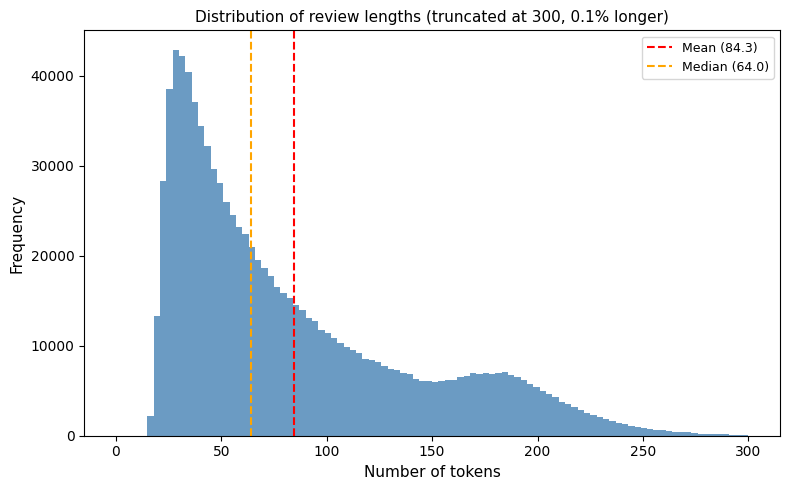

Reviews > 300 tokens: 1,088 (0.1%)


In [29]:
import matplotlib.pyplot as plt

tokens_per_review = lengths

mean_val = df_lengths_token.mean()
median_val = df_lengths_token.median()
p95 = df_lengths_token.quantile(0.95)

# Wie viele sind über 300?
over_300 = sum(1 for t in tokens_per_review if t > 300)
pct_over_300 = over_300 / len(tokens_per_review) * 100

fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(tokens_per_review, bins=100, color="steelblue", edgecolor="none", alpha=0.8, range=(0, 300))
ax.set_xlabel("Number of tokens", fontsize=11)
ax.set_ylabel("Frequency", fontsize=11)
ax.set_title(f"Distribution of review lengths (truncated at 300, {pct_over_300:.1f}% longer)", fontsize=11)
ax.axvline(x=mean_val, color="red", linestyle="--", linewidth=1.5, label=f"Mean ({mean_val:.1f})")
ax.axvline(x=median_val, color="orange", linestyle="--", linewidth=1.5, label=f"Median ({median_val:.1f})")
ax.legend(fontsize=9)

plt.tight_layout()
plt.savefig("token_distribution.png", dpi=150, bbox_inches="tight")
plt.show()

print(f"Reviews > 300 tokens: {over_300:,} ({pct_over_300:.1f}%)")